# Week 6 - Deep Learning

The goal of this assignment is to test and compare some simple deep learning architectures for the problem of image classification. We will be using the Tensorflow framework.
The CIFAR-10 dataset contains 60000 images divided into 10 classes. The set is split in 50000 and 10000 samples for the training and testing set, respectively. The tutorial found at [https://www.tensorflow.org/tutorials/images/cnn] gives a good introduction to this practical exercise. The essential code for this tutorial can be found in the provided script 'ConvNet.py' or as a Jupyter notebook in [https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/images/cnn.ipynb].

## Imports

In [1]:
import numpy as np
import pandas as pd
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
import matplotlib.pyplot as plt

## Data

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170508288/170498071 [==============================] - 578s 3us/step


## MLP

In [4]:
model = models.Sequential([
    layers.Flatten(),
    layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50,
                    validation_data=(test_images, test_labels))

model.summary()

test_loss, test_acc = model.evaluate(test_images, test_labels)

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9577 - accuracy: 0.3205 - val_loss: 1.8686 - val_accuracy: 0.3384
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8890 - accuracy: 0.3500 - val_loss: 1.8540 - val_accuracy: 0.3601
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8480 - accuracy: 0.3624 - val_loss: 1.8320 - val_accuracy: 0.3556
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8404 - accuracy: 0.3673 - val_loss: 1.8558 - val_accuracy: 0.3586
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8298 - accuracy: 0.3735 - val_loss: 1.8478 - val_accuracy: 0.3678
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8223 - accuracy: 0.3776 - val_loss: 1.8252 - val_accuracy: 0.3724
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8240 - accuracy: 0.3773 - val_loss: 1.8838 - val_accuracy:

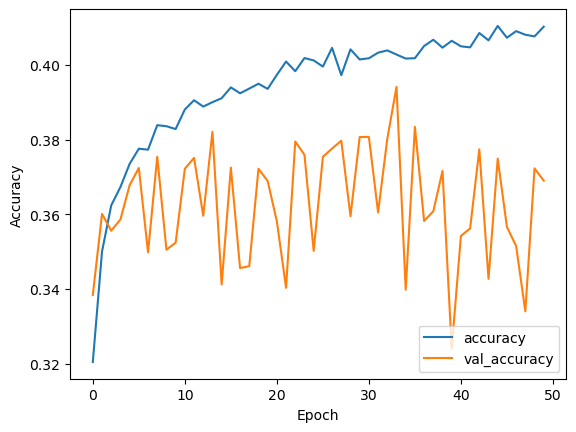

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## ConvNet

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # from this we know that input dimensions are 32x32x3
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

model.summary()

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.5252 - accuracy: 0.4445 - val_loss: 1.2225 - val_accuracy: 0.5657
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1642 - accuracy: 0.5877 - val_loss: 1.1179 - val_accuracy: 0.5959
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0151 - accuracy: 0.6405 - val_loss: 1.0399 - val_accuracy: 0.6289
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9174 - accuracy: 0.6772 - val_loss: 1.0570 - val_accuracy: 0.6359
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8460 - accuracy: 0.7011 - val_loss: 0.9351 - val_accuracy: 0.6790
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7876 - accuracy: 0.7234 - val_loss: 0.9069 - val_accuracy: 0.6831
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7424 - accuracy: 0.7416 - val_loss: 0.8969 - val_accuracy

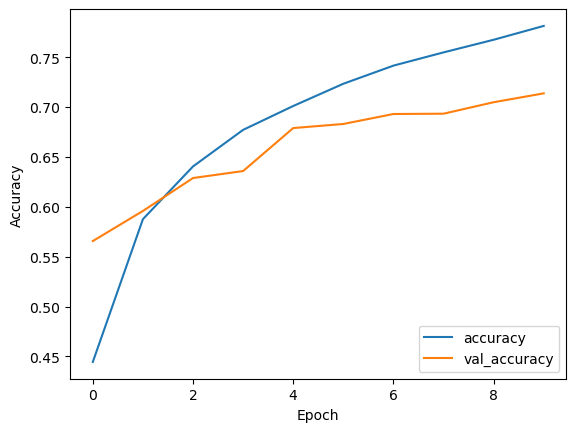

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
#plt.ylim([0.5, 1])
plt.legend(loc='lower right')

## Exercise 1

Modify the provided MLP model. Use architectures with 0, 1 and 2 hidden layers. Keep the complexity of the model bounded, so runs do not take much more than 1 hour to reach the maximum of testing accuracy. Notice that the input needs to be "flattened", since there is no spatial structure 
in this fully connected design. This can be achieved by adding a dummy layer with no free parameters with "layers.Flatten()" as the first layer in the constructor "model.Sequential()". Obtain the learning curves and discuss the results.
Report the optimizer in use, initialization parameters, the learning rate, etc. Is early stopping convenient in this model?

## Exercise 2

Reuse the code from Exercise 1 to build and run an MLP with one hidden layer, as big a you can. Compare the performance of your design with the results appearing in Table 1 of [https://arxiv.org/pdf/1611.03530.pdf] for an MLP of 512 units in a single hidden layer. Report the best result found for a maximum of 1000 epochs or 2 hours CPU running time.
The best accuracy amongst all teams will be awarded extra points.

## Exercise 3

Study the performance properties of the convolutional network provided. How is the learning affected if instead of ReLU units, tanh() activations are used? What is the reason for this? Compare also at least two different optimizer algorithms.

## Exercise 4

Try to outperform the convolutional network from Exercise 3 with an MLP that uses approximately the same number of parameters.
Report your results and explain them.